In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="darkgrid")

In [2]:
df = pd.read_csv('cleaned_data.csv')
df = df.drop(['Unnamed: 0','Title'],axis=1)

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 626 entries, 0 to 625
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Price         626 non-null    float64
 1   No. Reviews   626 non-null    int64  
 2   Display size  626 non-null    float64
 3   Storage type  626 non-null    object 
 4   CPU Speed     626 non-null    float64
 5   RAM           626 non-null    int64  
 6   Rating        626 non-null    float64
 7   Brand         626 non-null    object 
 8   graphics      626 non-null    int64  
 9   Processor     626 non-null    object 
dtypes: float64(4), int64(3), object(3)
memory usage: 49.0+ KB


### Getting Dummies for Categorical features

In [4]:
df = pd.get_dummies(data = df)
df.columns

Index(['Price', 'No. Reviews', 'Display size', 'CPU Speed', 'RAM', 'Rating',
       'graphics', 'Storage type_EMMC',
       'Storage type_Flash Memory Solid State', 'Storage type_HDD',
       'Storage type_Others', 'Storage type_SATA', 'Storage type_SSD',
       'Brand_acer', 'Brand_apple', 'Brand_asus', 'Brand_dell', 'Brand_hp',
       'Brand_lenovo', 'Brand_other_brand', 'Processor_amd', 'Processor_i3',
       'Processor_i5', 'Processor_i7', 'Processor_i9', 'Processor_unknown'],
      dtype='object')

### Importing Necessary libraries

In [19]:
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression , Lasso
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score,mean_absolute_error
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import MinMaxScaler

### Creating train test split for our model

In [20]:
X = df.drop('Price',axis=1)
y = df.Price.values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

### Multiple Linear Regression

In [21]:
linreg = LinearRegression().fit(X_train,y_train)
linreg_y_pred = linreg.predict(X_test)

print("R2 Score :",r2_score(y_test, linreg_y_pred))

score = cross_val_score(linreg, X, y, scoring = 'r2', cv=5).mean()

print("Cross validation score" , score)

R2 Score : 0.6129941346013468
Cross validation score 0.6482594708513224


### Lasso Regression

In [24]:
# Lets scale the data
scaler = MinMaxScaler().fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

lasso = Lasso(alpha=0.1).fit(X_train,y_train)
print("R2 Score :",lasso.score(X_test, y_test))


R2 Score : 0.6141669092692867


### Finding the best value for alpha

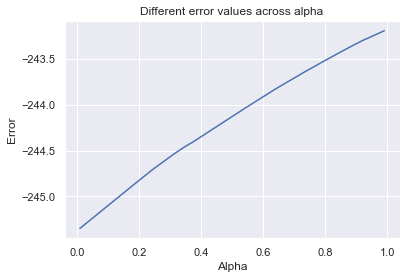

In [25]:
alpha = []
error = []
for i in range(1,100):
    alpha.append(i/100)
    lasso = Lasso(alpha=i/100, max_iter=10000)
    error.append(cross_val_score(lasso, X, y, scoring = 'neg_mean_absolute_error', cv=5).mean())
plt.title("Different error values across alpha")
plt.xlabel("Alpha")
plt.ylabel('Error')
plt.plot(alpha,error)
plt.show()

In [26]:
print("Best alpha value for Lasso: ",alpha[np.argmax(error)])

lasso = Lasso(alpha=0.1, max_iter = 10000)
score = cross_val_score(lasso, X, y, scoring = 'r2', cv=5).mean()
print("Cross validation score " , score)

Best alpha value for Lasso:  0.99
Cross validation score  0.6480111447828305


### Random Forest Regressor

In [30]:
rf = RandomForestRegressor()
rf = rf.fit(X_train,y_train)
print("The R2 score is ",rf.score(X_test,y_test))

The R2 score is  0.7924855602625669
